In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)

# Data Cleaning and Data Visualization

In [22]:
# Using a dataset from Kaggle 
df1 = pd.read_csv('game_dataset.csv')
df1.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [23]:
#Checking for missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

<Axes: >

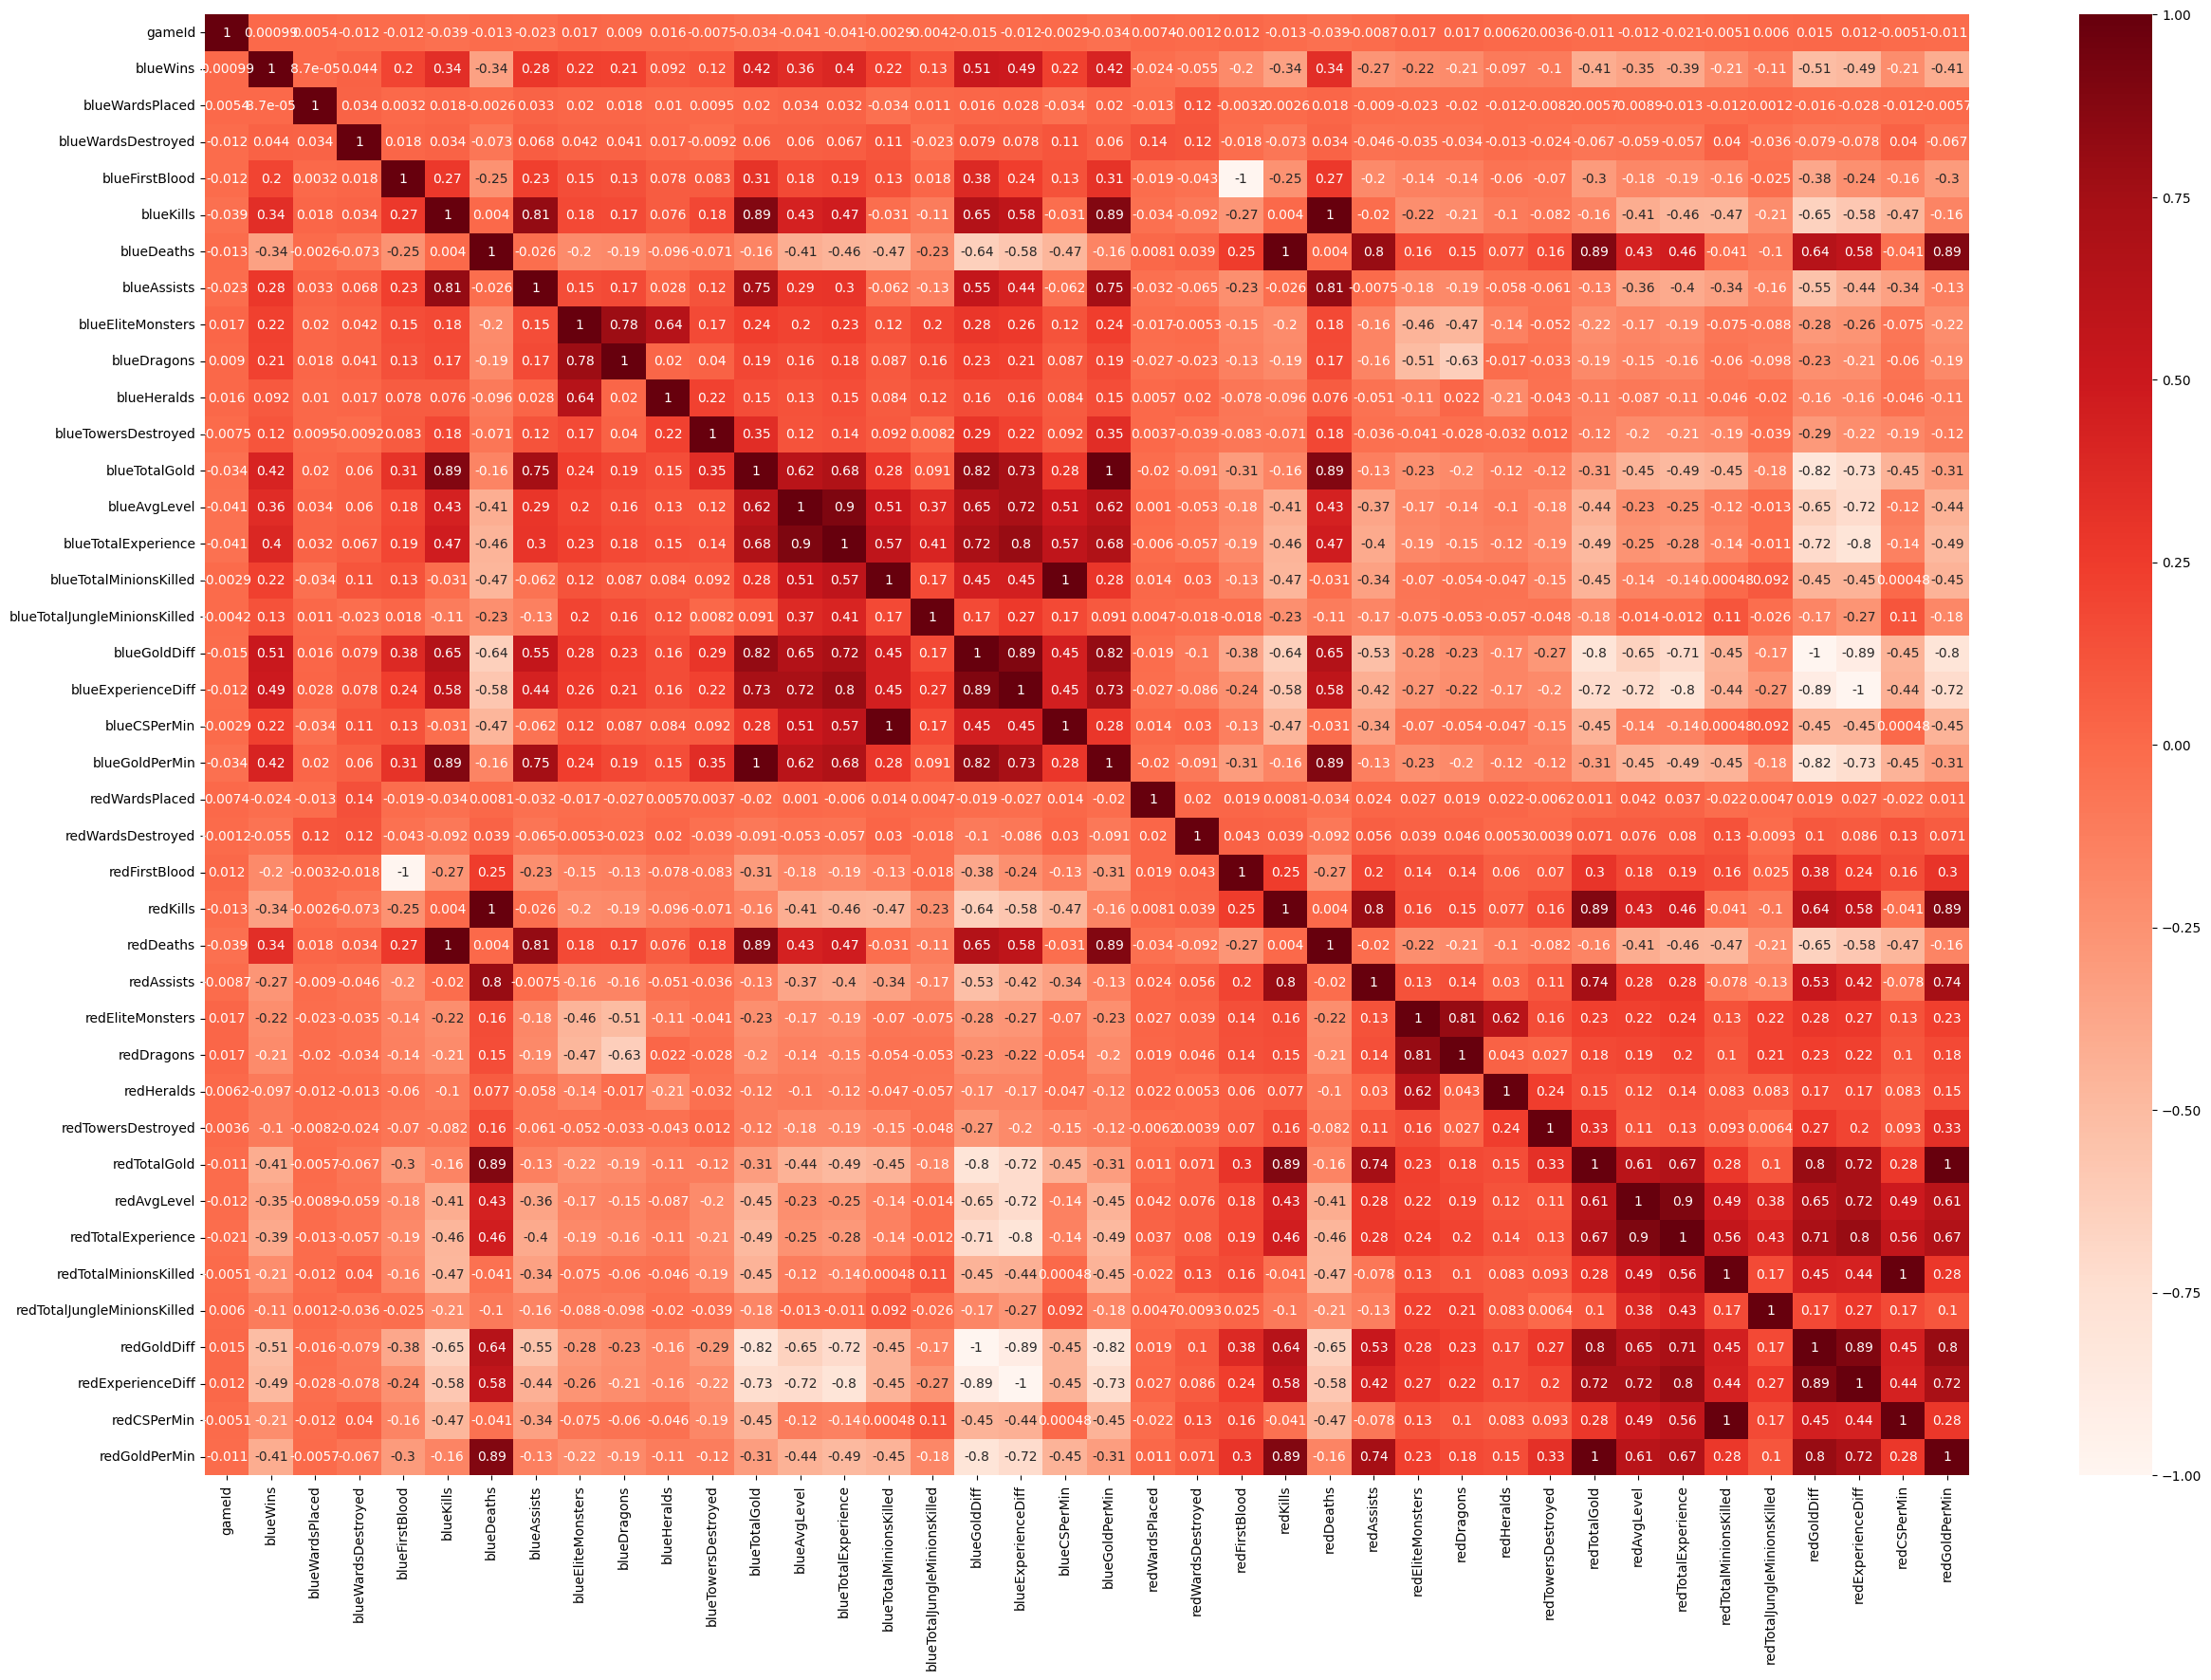

In [24]:
# The dataset is already decently clean but we can still make some improvements
# We need get rid of certain columns that give the same information (ex: 'redExperienceDiff' and 'blueExperienceDiff' since there are only 2 teams, only keeping one of those columns is enough to represent the data)
# We also get rid of unecessary columns (ex: 'gameId' since it is not useful for our analysis) 
# Let's plot the correlation matrix to see how it is

plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(),annot=True,cmap='Reds')

In [25]:
# As expected we can see that certain features reprensents the same data with a very high correlation value (1 or -1)
# We can now clean the database to avoid those repeated columns.
# And get rid or unecessary columns
# Some decisions involving deleting certain features come from game knowledge that I acquired playing the game (ex: 'redWardsPlaced' and 'redWardsDestroyed' have almost no impact on the game)

columns = ['gameId',
           'redWardsPlaced',
           'redWardsDestroyed',
           'redDeaths', 
           'redTotalExperience',
           'redTotalGold', 
           'redAvgLevel',
           'redExperienceDiff', 
           'redCSPerMin', 
           'redGoldPerMin',
           'redTotalMinionsKilled',
           'redTotalJungleMinionsKilled', 
           'redGoldDiff', 
           'redFirstBlood',
           'redKills',
           'redEliteMonsters',
           'blueAvgLevel',
           'blueEliteMonsters',
           'blueTotalExperience',
           'blueTotalGold',
           'blueCSPerMin', 
           'blueGoldPerMin',
           'blueTotalJungleMinionsKilled',
           'blueTotalMinionsKilled' 
           ]
df2= df1.drop(columns, axis=1)
df2.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueGoldDiff,blueExperienceDiff,redAssists,redDragons,redHeralds,redTowersDestroyed
0,0,28,2,1,9,6,11,0,0,0,643,-8,8,0,0,0
1,0,12,1,0,5,5,5,0,0,0,-2908,-1173,2,1,1,1
2,0,15,0,0,7,11,4,1,0,0,-1172,-1033,14,0,0,0
3,0,43,1,0,4,5,5,0,1,0,-1321,-7,10,0,0,0
4,0,75,4,0,6,6,6,0,0,0,-1004,230,7,1,0,0


In [26]:
# Looking at the matrix again, we can now drop the features that have little correlation with our prediction variable 'blueWins'.
correlation_list = df2[df2.columns[1:]].apply(lambda x: x.corr(df2['blueWins']))
columns = []

# We chose to drop the features that have a correlation value less than 0.1 or greater than -0.1. We might try with other values later.
# We also get rid of the 'blueWins' column since it is our prediction variable.
for value in correlation_list.index:
    # The Accuracy is better with 0.2
    if (correlation_list[value]>0.1 or correlation_list[value]<-0.1):
        columns.append(value)  
        
print(columns)  
df2 = df2[columns]

['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueTowersDestroyed', 'blueGoldDiff', 'blueExperienceDiff', 'redAssists', 'redDragons', 'redTowersDestroyed']


In [27]:
df2.shape

(9879, 11)

array([[<Axes: title={'center': 'blueFirstBlood'}>,
        <Axes: title={'center': 'blueKills'}>,
        <Axes: title={'center': 'blueDeaths'}>],
       [<Axes: title={'center': 'blueAssists'}>,
        <Axes: title={'center': 'blueDragons'}>,
        <Axes: title={'center': 'blueTowersDestroyed'}>],
       [<Axes: title={'center': 'blueGoldDiff'}>,
        <Axes: title={'center': 'blueExperienceDiff'}>,
        <Axes: title={'center': 'redAssists'}>],
       [<Axes: title={'center': 'redDragons'}>,
        <Axes: title={'center': 'redTowersDestroyed'}>, <Axes: >]],
      dtype=object)

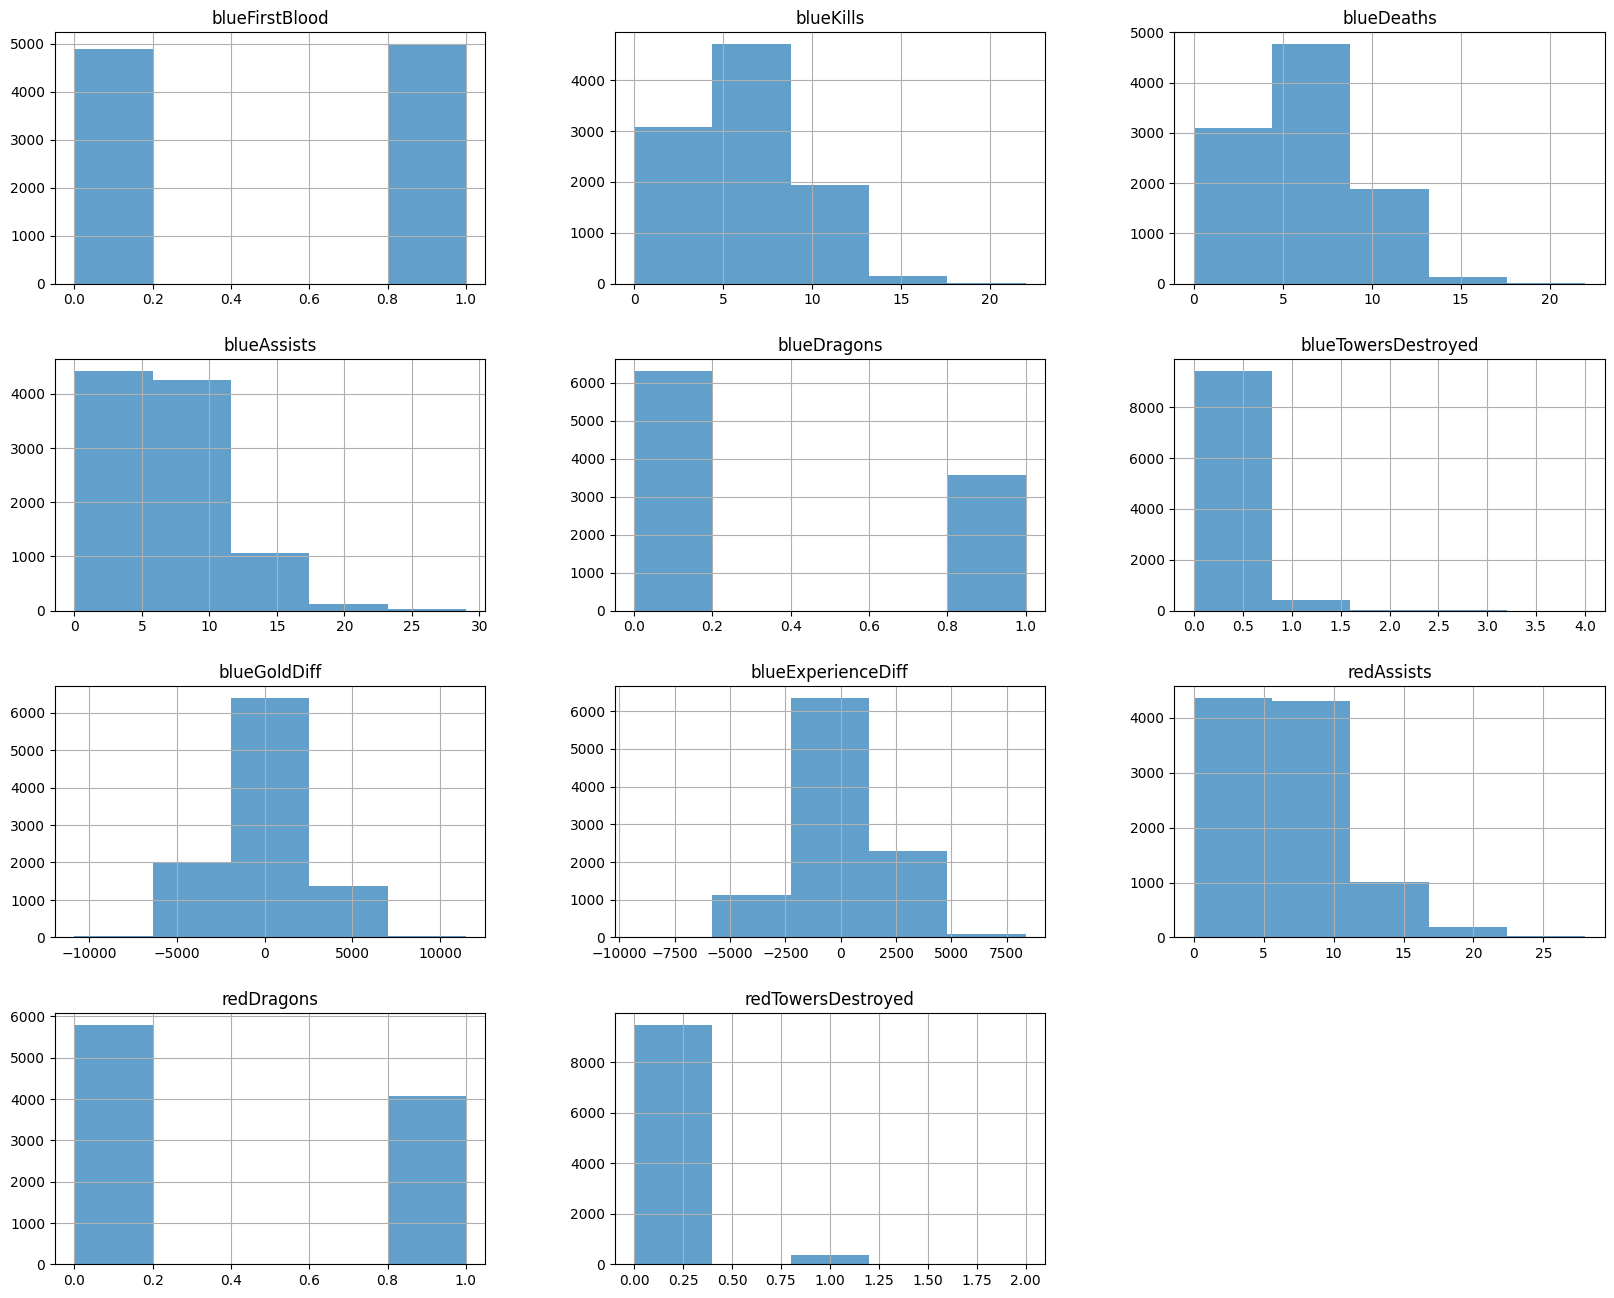

In [28]:
df2.hist(alpha = 0.7, figsize=(20,16), bins=5)

# Model Creation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [30]:
x = df2
y = df1['blueWins']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [32]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(MinMaxScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df3 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df3

,model,best_score,best_params
0,svm,0.731242,"{'svc__C': 1000, 'svc__kernel': 'linear'}"
1,random_forest,0.694800,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.730989,{'logisticregression__C': 5}


In [33]:
best_estimators['svm'].score(x_test, y_test)

0.7332995951417004

In [34]:
best_estimators['random_forest'].score(x_test, y_test)

0.7074898785425101

In [35]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.729757085020243

In [36]:
# The best model is the SVM model
best_clf = best_estimators['svm']

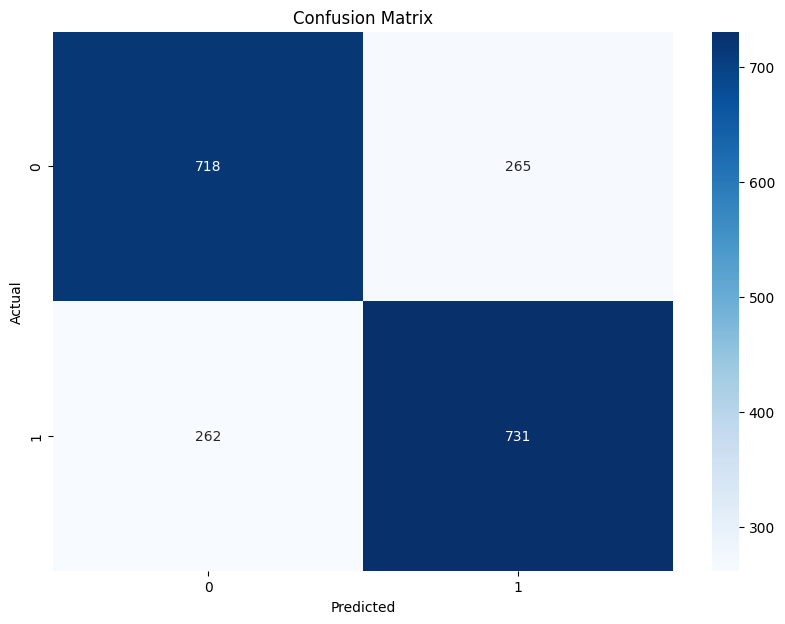

In [37]:
cm = confusion_matrix(y_test, best_clf.predict(x_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model

In [38]:
import pickle
with open('lol_model.pickle', 'wb') as f:
    pickle.dump(best_clf, f)